In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split, RepeatedStratifiedKFold, KFold
from sklearn.feature_selection import RFECV, SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler

In [6]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn_evaluation import plot

In [7]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Análise inicial

In [8]:
df = pd.read_csv("./data.csv")

In [9]:
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [10]:
# df.columns

In [11]:
df.isna().sum().sort_values()

Bankrupt?                                 0
 Total income/Total expense               0
 Retained Earnings to Total Assets        0
 Long-term Liability to Current Assets    0
 Current Liabilities/Equity               0
                                         ..
 Regular Net Profit Growth Rate           0
 After-tax Net Profit Growth Rate         0
 Operating Profit Growth Rate             0
 Net Income Flag                          0
 Equity to Liability                      0
Length: 96, dtype: int64

In [12]:
df.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


In [13]:
df["Bankrupt?"].value_counts()

0    6599
1     220
Name: Bankrupt?, dtype: int64

In [14]:
df.dtypes

Bankrupt?                                                     int64
 ROA(C) before interest and depreciation before interest    float64
 ROA(A) before interest and % after tax                     float64
 ROA(B) before interest and depreciation after tax          float64
 Operating Gross Margin                                     float64
                                                             ...   
 Liability to Equity                                        float64
 Degree of Financial Leverage (DFL)                         float64
 Interest Coverage Ratio (Interest expense to EBIT)         float64
 Net Income Flag                                              int64
 Equity to Liability                                        float64
Length: 96, dtype: object

## Visualizações

In [15]:
# corr = df.corr()
# cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

# corr.style.background_gradient(cmap, axis=1)\
#     .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
#     .set_precision(2)

## Z-Scaling

In [16]:
scaled_features = df.copy()

col_names = list(df.columns)
col_names.remove("Bankrupt?")
col_names.remove(" Liability-Assets Flag")
col_names.remove(" Net Income Flag")

features = scaled_features[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)

scaled_features[col_names] = features

df = scaled_features

array([[<AxesSubplot:title={'center':'Bankrupt?'}>,
        <AxesSubplot:title={'center':' ROA(C) before interest and depreciation before interest'}>,
        <AxesSubplot:title={'center':' ROA(A) before interest and % after tax'}>,
        <AxesSubplot:title={'center':' ROA(B) before interest and depreciation after tax'}>,
        <AxesSubplot:title={'center':' Operating Gross Margin'}>,
        <AxesSubplot:title={'center':' Realized Sales Gross Margin'}>,
        <AxesSubplot:title={'center':' Operating Profit Rate'}>,
        <AxesSubplot:title={'center':' Pre-tax net Interest Rate'}>,
        <AxesSubplot:title={'center':' After-tax net Interest Rate'}>,
        <AxesSubplot:title={'center':' Non-industry income and expenditure/revenue'}>],
       [<AxesSubplot:title={'center':' Continuous interest rate (after tax)'}>,
        <AxesSubplot:title={'center':' Operating Expense Rate'}>,
        <AxesSubplot:title={'center':' Research and development expense rate'}>,
        <AxesSubp

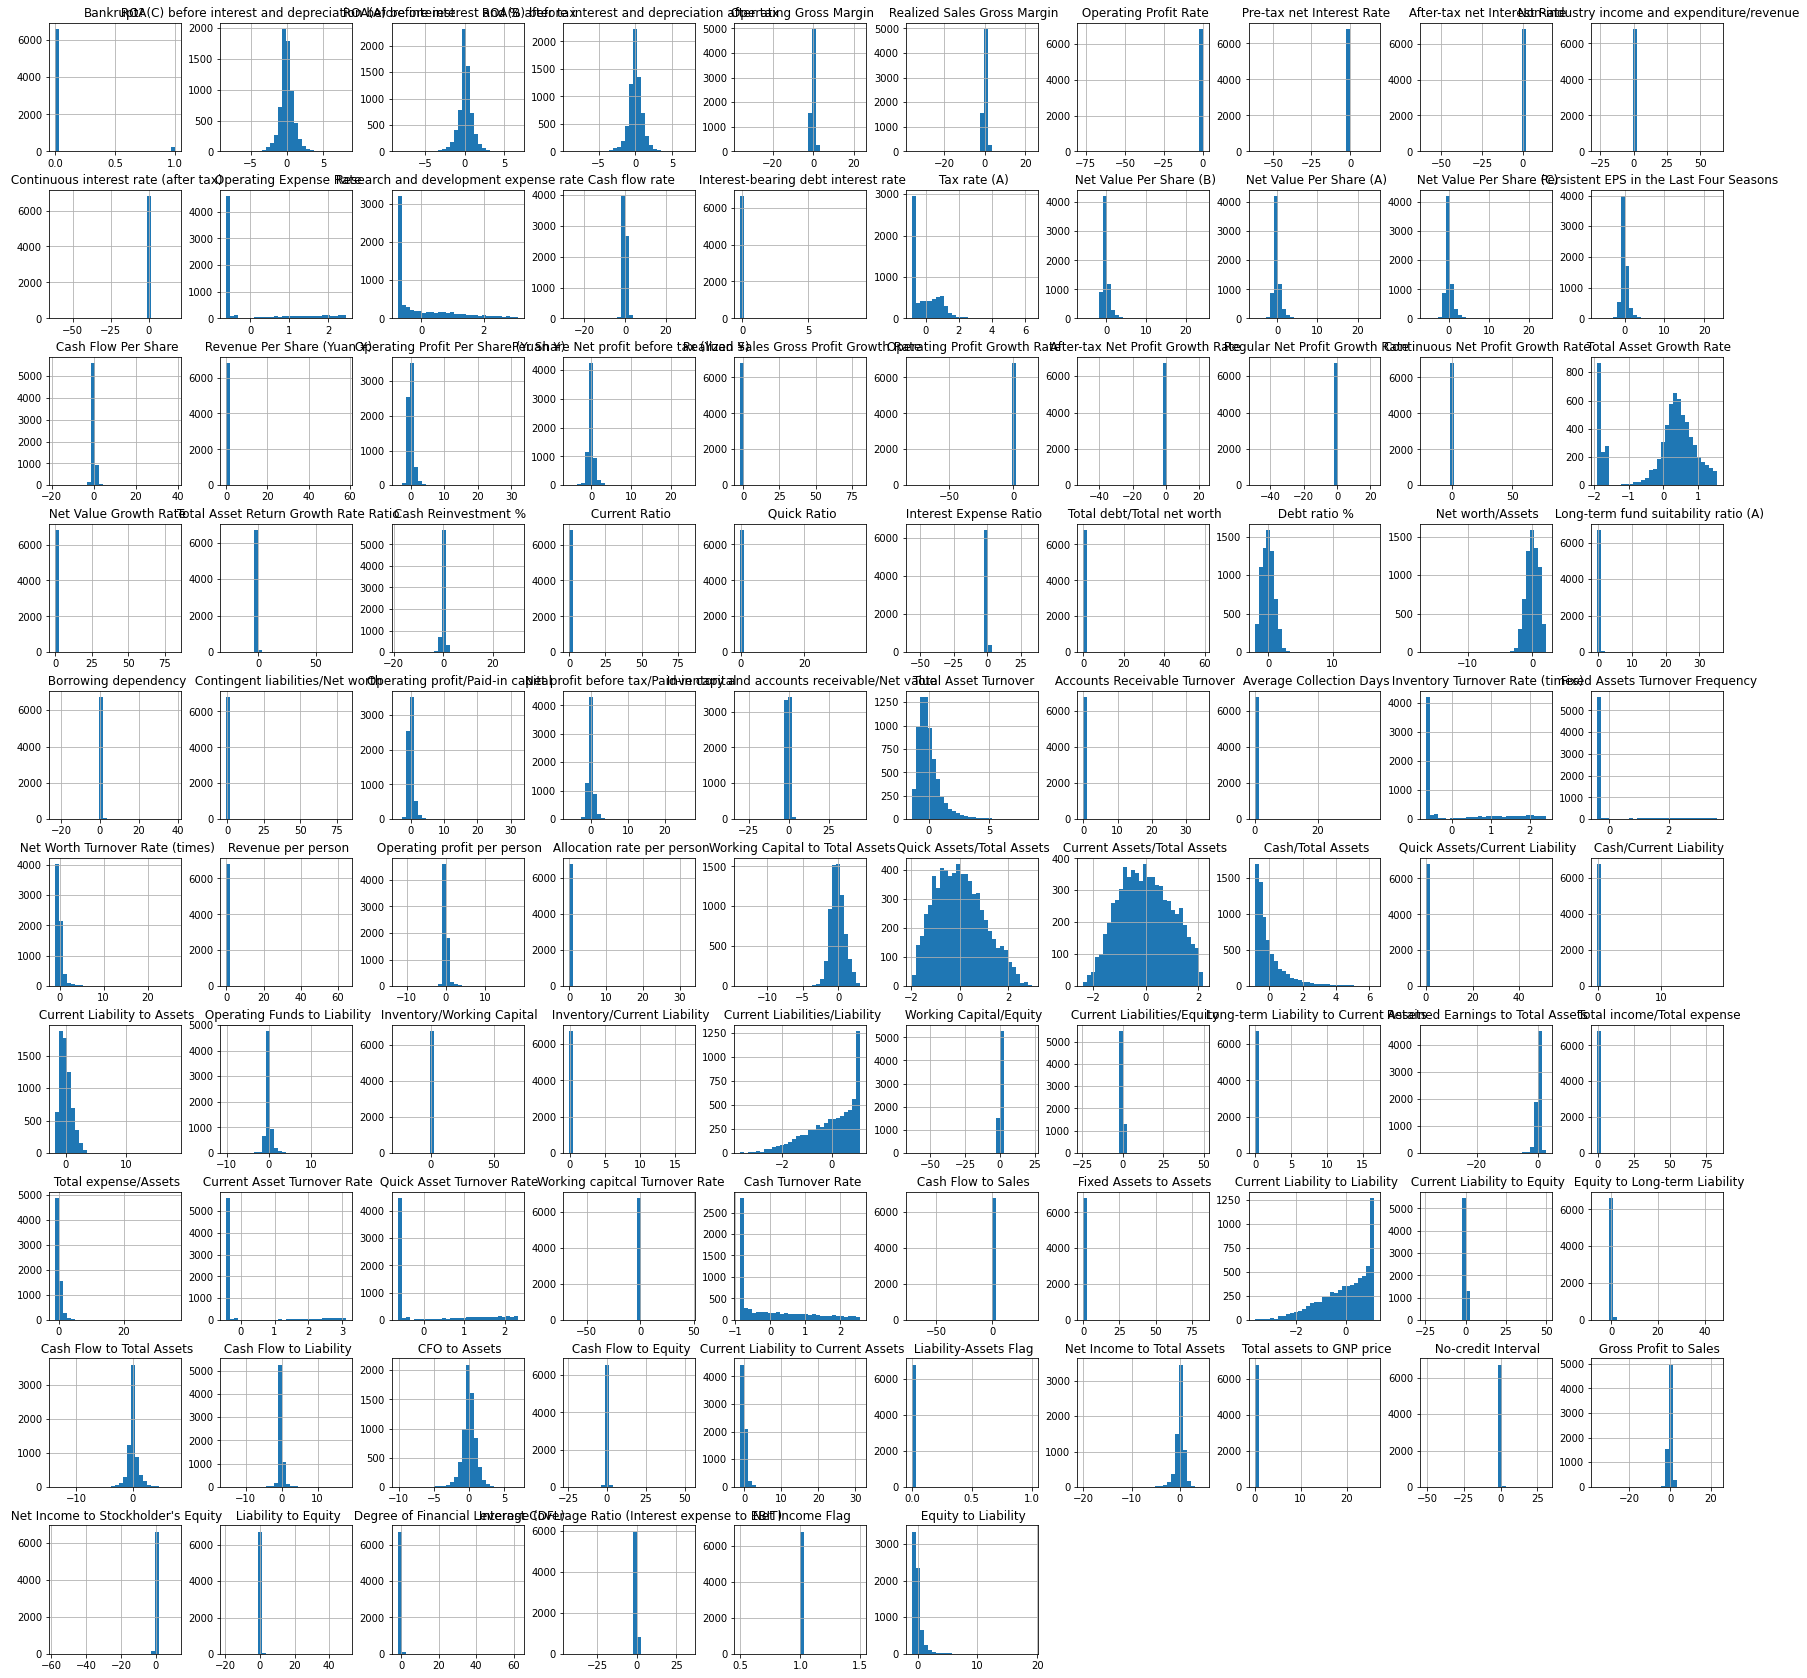

In [17]:
df.hist(bins=30, figsize=(30, 30))

In [ ]:
# pd.plotting.scatter_matrix(df, alpha=0.2, figsize=(100, 100))

In [ ]:
# pd.plotting.scatter_matrix(df, alpha=0.2)

# Feature Selection


In [ ]:
# Set X and y 
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values
# Set training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
# Set RandomForestClassifier as estimator for RFECV
cart = RandomForestClassifier(random_state=42)
# Minimum number of features to consider
min_features_to_select = 1
# Set number of folds
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=1)
# Set cross-validation process
rfecv = RFECV(estimator=cart, step=1, cv=cv,
              scoring='f1',
              min_features_to_select=min_features_to_select, n_jobs=-1,verbose=1)
# Fit the model
rfecv.fit(X_train, y_train)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(min_features_to_select,
               len(rfecv.grid_scores_) + min_features_to_select),
         rfecv.grid_scores_)
plt.show()

In [ ]:
most_relevent_cols = df.iloc[:, 1:].columns[np.where(rfecv.support_ == True)]
print("Most relevant features are: ")
print(most_relevent_cols)

# Aplicação dos modelos

## Data split

In [18]:
features = df.copy().drop(columns=["Bankrupt?"])
target = df["Bankrupt?"]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.3, random_state=1
)
print(y_train.value_counts(sort=False))
print(y_test.value_counts(sort=False))

0    4624
1     149
Name: Bankrupt?, dtype: int64
0    1975
1      71
Name: Bankrupt?, dtype: int64


## Geração de registros para balanceamento

In [24]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=1)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

In [25]:
from imblearn.over_sampling import RandomOverSampler

over_sampler = RandomOverSampler(random_state=42)
X_train_dup, y_train_dup = over_sampler.fit_resample(X_train, y_train)

In [26]:
from imblearn.under_sampling import NearMiss
under_sampler = NearMiss()
X_train_under, y_train_under = under_sampler.fit_resample(X_train, y_train)

## Grid search

In [27]:
validation_cicles = 2

experiment_list = [
    {
        "name": "Decision Tree",
        "classifier": DecisionTreeClassifier,
        "params": {
            #"criterion": ["gini", "entropy"],
            "random_state": [100],
            "max_depth": [4, 16, 32,64],
            "min_samples_leaf": [5, 10, 50],
            #"max_features": ["auto", "sqrt", "log2"],
        },
        "change" : ('max_depth', 'min_samples_leaf'),
    },
    {
        "name": "Random Forest",
        "classifier": RandomForestClassifier,
        "params": {
           #"criterion": ["gini", "entropy"],
            "random_state": [100],
            "max_depth": [4, 16, 32],
            "min_samples_leaf": [5, 10, 50],
            #"max_features": ["auto", "sqrt", "log2"],
        },
        "change" : ('max_depth', 'min_samples_leaf')
    },
#     {
#         "name": "Gradient Boosting Classifier",
#         "classifier": GradientBoostingClassifier,
#         "params": {
#             #"loss": ["deviance", "exponential"],
#             "n_estimators": [5,20,50,100],
#             "subsample": [0.5, 1],
#             #"criterion": ["friedman_mse", "mse", "mae"],
#             #"max_features": ["auto", "sqrt", "log2", None],
#         },
#         "change" : ('n_estimators', 'subsample')
#     },
#     {
#         "name": "SVC",
#         "classifier": SVC,
#         "params": {
#             "C": [0.1,1, 10, 100],
#             "kernel": ["linear", "rbf", "sigmoid"],
#             #"gamma": ["auto", "scale"],
#         },
#         "change" : ('C', 'kernel')
#     },
#     {
#         "name": "MLP Classifier",
#         "classifier": MLPClassifier,
#         "params": {
#             #"activation": ["identity", "logistic", "relu", "softmax", "tanh"],
#             "solver": ["lbfgs", "sgd", "adam"],
#             "alpha": [0.0001, 0.001, 0.1],
#         },
#         "change" : ('solver', 'alpha')
#     },
]


def run_experiments(features,target,X_train, y_train, X_test, y_test,scoring="f1"):
    for experiment in experiment_list:
        print(experiment["name"])

        grid = GridSearchCV(
            experiment["classifier"](),
            experiment["params"],
            cv=validation_cicles,
            scoring=scoring,
            refit=True,
            n_jobs=-1,
            return_train_score=True,
            verbose=3,
        )

        grid.fit(features, target)
        print("Best score:")
        print(grid.best_score_)
        print("Best params:")
        print(grid.best_params_)

        print("\n")

        plot.grid_search(grid.cv_results_, change=experiment["change"])
        plt.show()
        model = experiment["classifier"](**grid.best_params_)

        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        print(classification_report(y_test, y_pred))

        data = {"y_Actual": y_test, "y_Predicted": y_pred}

        y_df = pd.DataFrame(data, columns=["y_Actual", "y_Predicted"])
        confusion_matrix = pd.crosstab(
            y_df["y_Actual"],
            y_df["y_Predicted"],
            rownames=["Actual"],
            colnames=["Predicted"],
        )

        sns.heatmap(confusion_matrix, annot=True)
        plt.show()

        print("\n")
        print("\n")

Fitting with original dataset...
Decision Tree
Fitting 2 folds for each of 12 candidates, totalling 24 fits
Best score:
0.25885885885885884
Best params:
{'max_depth': 16, 'min_samples_leaf': 5, 'random_state': 100}




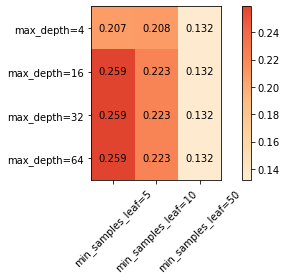

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1975
           1       0.32      0.24      0.27        71

    accuracy                           0.96      2046
   macro avg       0.65      0.61      0.63      2046
weighted avg       0.95      0.96      0.95      2046



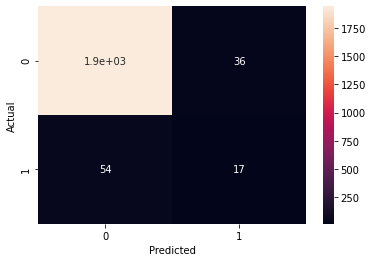





Random Forest
Fitting 2 folds for each of 9 candidates, totalling 18 fits
Best score:
0.23470794964188796
Best params:
{'max_depth': 16, 'min_samples_leaf': 5, 'random_state': 100}




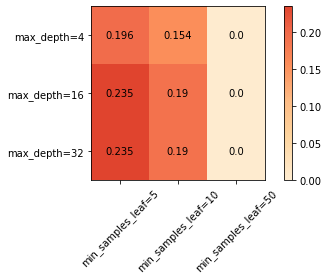

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1975
           1       0.56      0.13      0.21        71

    accuracy                           0.97      2046
   macro avg       0.77      0.56      0.59      2046
weighted avg       0.96      0.97      0.96      2046



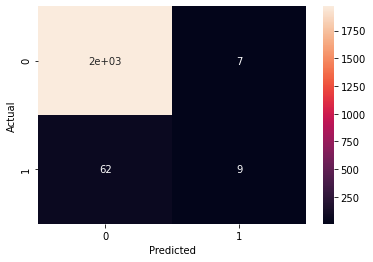

In [28]:
print("Fitting with original dataset...")
run_experiments(features,target,X_train, y_train, X_test, y_test,"f1")

Fitting with original dataset...
Decision Tree
Fitting 2 folds for each of 12 candidates, totalling 24 fits
Best score:
0.25885885885885884
Best params:
{'max_depth': 16, 'min_samples_leaf': 5, 'random_state': 100}




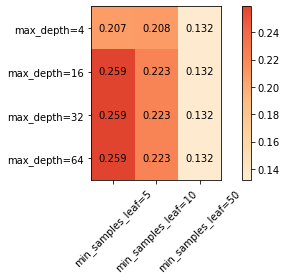

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1975
           1       0.31      0.46      0.37        71

    accuracy                           0.94      2046
   macro avg       0.64      0.71      0.67      2046
weighted avg       0.96      0.94      0.95      2046



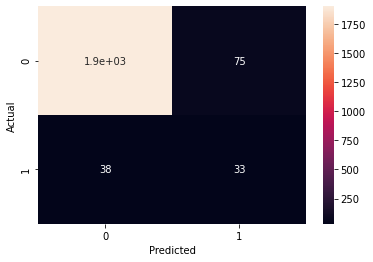





Random Forest
Fitting 2 folds for each of 9 candidates, totalling 18 fits
Best score:
0.23470794964188796
Best params:
{'max_depth': 16, 'min_samples_leaf': 5, 'random_state': 100}




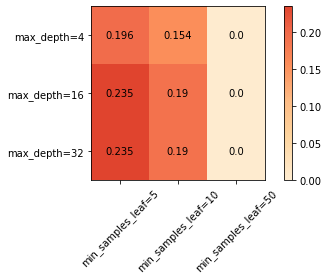

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1975
           1       0.41      0.44      0.42        71

    accuracy                           0.96      2046
   macro avg       0.70      0.71      0.70      2046
weighted avg       0.96      0.96      0.96      2046



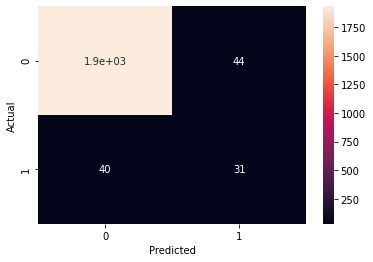

In [29]:
print("Fitting with original dataset...")
run_experiments(features,target,X_train_dup, y_train_dup, X_test, y_test,"f1")

In [30]:
print("Fitting with resempled dataset...")
run_experiments(features,target,X_train_smote, y_train_smote, X_test_smote, y_test_smote,"f1")

Fitting with resempled dataset...


NameError: name 'X_test_smote' is not defined

Fitting with resempled dataset...
Decision Tree
Fitting 2 folds for each of 12 candidates, totalling 24 fits
Best score:
0.25885885885885884
Best params:
{'max_depth': 16, 'min_samples_leaf': 5, 'random_state': 100}




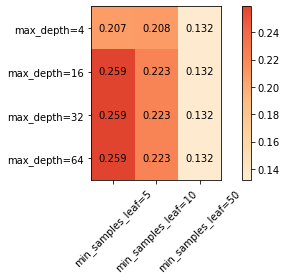

              precision    recall  f1-score   support

           0       0.98      0.50      0.66      1975
           1       0.05      0.77      0.10        71

    accuracy                           0.51      2046
   macro avg       0.52      0.64      0.38      2046
weighted avg       0.95      0.51      0.64      2046



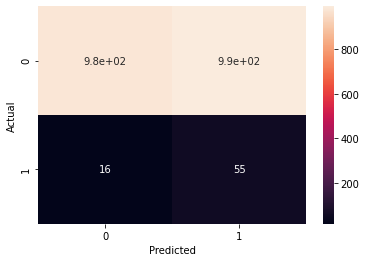





Random Forest
Fitting 2 folds for each of 9 candidates, totalling 18 fits
Best score:
0.23470794964188796
Best params:
{'max_depth': 16, 'min_samples_leaf': 5, 'random_state': 100}




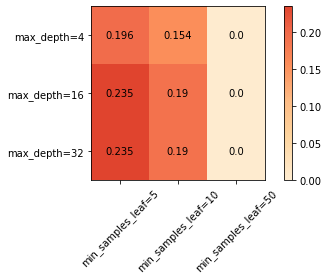

              precision    recall  f1-score   support

           0       0.99      0.84      0.91      1975
           1       0.15      0.76      0.25        71

    accuracy                           0.84      2046
   macro avg       0.57      0.80      0.58      2046
weighted avg       0.96      0.84      0.89      2046



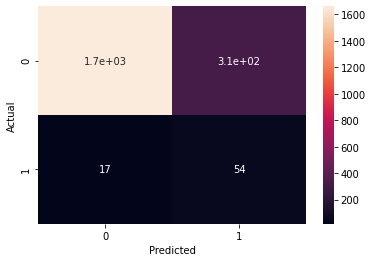

In [31]:
print("Fitting with resempled dataset...")
run_experiments(features,target,X_train_under, y_train_under, X_test, y_test,"f1")